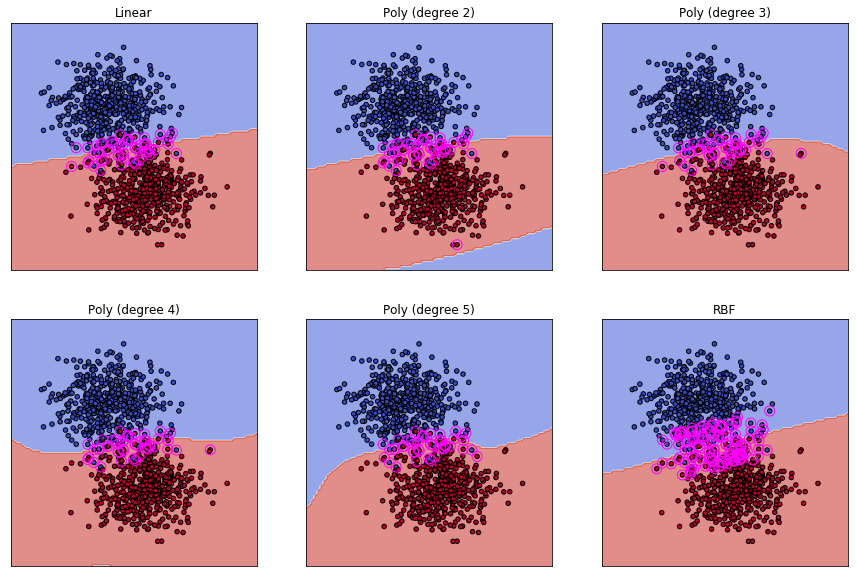

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def make_meshgrid(x, y, h=0.1):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

df = pd.read_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/02_MachinLearn/HW7/blobs2.csv')

df = df.values
df = np.array(df)

df_label = df[:, 2]
y = np.array(df_label)
df = np.delete(df, 2, 1)
X=df

C = 1.0 
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='poly', degree=4, C=C),
          svm.SVC(kernel='poly', degree=5, C=C),
          svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1))



# svm.fit(X_xor, y_xor)

models = (clf.fit(X, y) for clf in models)

titles = ('Linear',
          'Poly (degree 2)',
          'Poly (degree 3)',
          'Poly (degree 4)',
          'Poly (degree 5)',
          'RBF')

fig, sub = plt.subplots(2, 3, figsize=(15,10))

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# plt.figure(figsize=(100,100))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx.shape)
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolor='magenta')

plt.show()